คำสั่ง !pip install pythainlp เป็นคำสั่งที่ใช้ในการติดตั้งไลบรารี Python ชื่อว่า PyThaiNLP ซึ่งเป็นเครื่องมือที่ใช้สำหรับการประมวลผลภาษาธรรมชาติ (Natural Language Processing - NLP) ในภาษาไทย

PyThaiNLP มีฟังก์ชันที่สามารถแยกคำในภาษาไทยได้ ซึ่งเป็นการแยกข้อความที่เป็นประโยคยาวๆ ให้เป็นคำหรือหน่วยความหมายที่แยกออกจากกัน ตัวอย่างเช่น การแยกคำในข้อความ "สวัสดีครับ" จะได้ผลลัพธ์เป็น ['สวัสดี', 'ครับ'].

In [ ]:
!pip install pythainlp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 80.3 MB/s eta 0:00:00


สำหรับเชื่อมข้อมูลใน Google Drive ครับ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import library

In [ ]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf

from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_stopwords  #
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# โหลด stopwords ภาษาไทย
thai_stopwords = thai_stopwords()  # ✅ ใช้ pythainlp.corpus.common แทน nltk

print(f"จำนวน Stopwords ภาษาไทย: {len(thai_stopwords)}")
print(list(thai_stopwords)[:10])  # แสดงตัวอย่าง Stopwords


จำนวน Stopwords ภาษาไทย: 1030
['ยิ่งจะ', 'วันนี้', 'ทำๆ', 'จากนั้น', 'นั่นเป็น', 'คงอยู่', 'ซะจน', 'นับแต่นั้น', 'แหละ', 'จ้า']


ใช้ไลบรารีหลายตัวเพื่อเตรียมพร้อมสำหรับการประมวลผลข้อความภาษาไทยและการสร้างโมเดลการเรียนรู้ของเครื่อง (Machine Learning Model) สำหรับการจำแนกประเภทข้อความ (Text Classification)

###การทำงานของแต่ละไลบรารีที่นำเข้า

1. **Pandas (`import pandas as pd`)**:
   - ใช้สำหรับการจัดการข้อมูลในรูปแบบ DataFrame เช่น การอ่านข้อมูลจากไฟล์ CSV หรือ Excel, การทำงานกับข้อมูลที่มีหลายแถวหลายคอลัมน์, การจัดการข้อมูลที่หายไป ฯลฯ

2. **NumPy (`import numpy as np`)**:
   - ไลบรารีที่ใช้ในการคำนวณทางคณิตศาสตร์ รวมถึงการทำงานกับอาเรย์ที่มีประสิทธิภาพและการคำนวณทางสถิติ

3. **Matplotlib (`import matplotlib.pyplot as plt`) และ Seaborn (`import seaborn as sns`)**:
   - ใช้สำหรับการสร้างกราฟและการแสดงผลข้อมูลในรูปแบบกราฟิก เช่น กราฟแท่ง (Bar Plot), กราฟเส้น (Line Plot), กราฟกระจาย (Scatter Plot) และ Heatmap

4. **re**:
   - ไลบรารีที่ใช้สำหรับการทำงานกับ Regular Expressions (regex) ซึ่งจะช่วยในการค้นหาและการจัดการข้อความ เช่น การแทนที่ข้อความหรือการดึงข้อมูลตามรูปแบบที่กำหนด

5. **TensorFlow (`import tensorflow as tf`)**:
   - ไลบรารีที่ใช้สำหรับการพัฒนาและฝึกโมเดลการเรียนรู้เชิงลึก (Deep Learning) โดยใช้ Neural Networks รวมถึงการสร้างและฝึกโมเดลสำหรับงานต่างๆ เช่น การจำแนกประเภท, การทำนาย

6. **PyThaiNLP (`from pythainlp.tokenize import word_tokenize` และ `from pythainlp.corpus.common import thai_stopwords`)**:
   - ไลบรารีที่ใช้ในการประมวลผลภาษาธรรมชาติ (NLP) สำหรับภาษาไทย ซึ่งในที่นี้ใช้ `word_tokenize` ในการแยกคำจากข้อความภาษาไทย และ `thai_stopwords` เพื่อนำมาใช้ในการกรองคำที่ไม่มีความหมาย (Stopwords) เช่น "และ", "ที่", "เป็น"

7. **WordCloud (`from wordcloud import WordCloud`)**:
   - ไลบรารีที่ใช้ในการสร้างภาพ Word Cloud ซึ่งจะแสดงคำที่ใช้บ่อยในข้อมูลข้อความในรูปแบบภาพ เช่น ขนาดของคำจะแสดงความถี่ในการใช้งาน

8. **Scikit-learn (`from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`, `from sklearn.model_selection import train_test_split`, `from sklearn.naive_bayes import MultinomialNB`, `from sklearn.linear_model import LogisticRegression`, `from sklearn.tree import DecisionTreeClassifier`, `from sklearn.ensemble import RandomForestClassifier`, `from sklearn.svm import SVC`, `from sklearn.metrics import accuracy_score, classification_report, confusion_matrix`)**:
   - ไลบรารีสำหรับการทำงานกับโมเดลการเรียนรู้ของเครื่อง (Machine Learning) เช่น การเตรียมข้อมูล (Feature Extraction), การแบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ (Train-Test Split), การฝึกโมเดลต่างๆ เช่น Naive Bayes, Logistic Regression, Decision Tree, Random Forest, และ Support Vector Classifier (SVC), การประเมินผล (Accuracy, Classification Report, Confusion Matrix)

### ฟังก์ชันที่ทำงาน:
- **`thai_stopwords = thai_stopwords()`**:
  - ฟังก์ชันนี้จะโหลดรายการคำที่ไม่ให้ข้อมูล (stopwords) ในภาษาไทยจาก PyThaiNLP ซึ่งช่วยในการกรองคำที่ไม่สำคัญออกจากข้อความ เช่น คำบุพบท, คำที่เชื่อมประโยค หรือคำที่ใช้บ่อยเกินไป

- **`print(f"จำนวน Stopwords ภาษาไทย: {len(thai_stopwords)}")`**:
  - แสดงจำนวนของ stopwords ในภาษาไทย

- **`print(list(thai_stopwords)[:10])`**:
  - แสดงตัวอย่างของ stopwords ภาษาไทยจำนวน 10 คำแรก เช่น "และ", "ที่", "เป็น", "ของ", "กับ", ฯลฯ

ใช้ `stopwords` เพื่อกรองคำที่ไม่จำเป็นจากข้อความเมื่อทำการแยกคำและนำข้อมูลไปใช้ในการสร้างโมเดล Machine Learning ในขั้นตอนถัดไป.

# Import Data

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/181g26GfA59gAKuvorH4PdeP5lZVBI13lOcpOHu1WQw0/export?format=csv'
df = pd.read_csv(url)


In [ ]:
df

,id,review,food_sentiment,price_sentiment,service_sentiment,ambience_sentiment
0,9886,ทางเข้าร้านมาทางถนนเส้น ชัยนาท-มโนรมย์ ผ่านสี่...,positive,positive,NaN,positive
1,6521,ปกติ คิดอะไรไม่ออก ก็จะ จัด ซานตาเฟ่ ประจำ คิด...,positive,NaN,positive,positive
2,7429,ร้านนี้ มาได้ เรื่อย ๆ ข้าวอร่อย มีให้เลือกหลา...,positive,NaN,positive,positive
3,20550,ปกติไปทานร้านนี้เป็นประจำเพราะไม่ไกลจากที่ทำงา...,positive,NaN,positive,positive
4,34692,ร้านโรตีร้อยชั้น มีชื่อเรื่องโรตีโอ่ง เห็นคนพื...,positive,positive,NaN,positive
...,...,...,...,...,...,...
19995,11800,ครั้งก่อนมีโอกาสมาทานติ๋มซำที่ May Flower Rest...,negative,NaN,negative,negative
19996,14516,ร้านอาหารจีนเจ้าดังที่มีลูกค้ามากมาย เริ่มเข้า...,negative,negative,NaN,negative
19997,38123,นึกถึงอาหารทะเลสดๆคุณภาพแน่นๆเมื่อใหร่. ที่นี่...,negative,negative,negative,NaN
19998,25128,คือพาเพื่อนมาทานอาหารเมือง จากที่เคยผิดหวังร้า...,negative,NaN,negative,negative


จากข้อมูลที่คุณให้มา เรามี **DataFrame** ที่มี 6 คอลัมน์หลัก ๆ ซึ่งประกอบด้วย:

1. **id**: รหัสรีวิว
2. **review**: เนื้อหาของรีวิว
3. **food_sentiment**: ความคิดเห็นเกี่ยวกับอาหาร (positive/negative)
4. **price_sentiment**: ความคิดเห็นเกี่ยวกับราคา (positive/negative)
5. **service_sentiment**: ความคิดเห็นเกี่ยวกับบริการ (positive/negative)
6. **ambience_sentiment**: ความคิดเห็นเกี่ยวกับบรรยากาศ (positive/negative)

### การทำงานของโค้ด
โค้ดที่ใช้ `pd.read_csv(url)` ทำการโหลดข้อมูลจาก Google Spreadsheet ที่มีลิงก์เป็นไฟล์ CSV ลงใน DataFrame ของ **Pandas** ชื่อ `df`. ข้อมูลนี้จะช่วยในการวิเคราะห์รีวิวต่าง ๆ ที่เกี่ยวกับร้านอาหาร รวมถึงความคิดเห็นในหลายๆ ด้าน เช่น อาหาร, ราคา, บริการ และบรรยากาศ



In [ ]:
df.head()  # แสดง 5 แถวแรกของข้อมูล


,id,review,food_sentiment,price_sentiment,service_sentiment,ambience_sentiment
0,9886,ทางเข้าร้านมาทางถนนเส้น ชัยนาท-มโนรมย์ ผ่านสี่...,positive,positive,NaN,positive
1,6521,ปกติ คิดอะไรไม่ออก ก็จะ จัด ซานตาเฟ่ ประจำ คิด...,positive,NaN,positive,positive
2,7429,ร้านนี้ มาได้ เรื่อย ๆ ข้าวอร่อย มีให้เลือกหลา...,positive,NaN,positive,positive
3,20550,ปกติไปทานร้านนี้เป็นประจำเพราะไม่ไกลจากที่ทำงา...,positive,NaN,positive,positive
4,34692,ร้านโรตีร้อยชั้น มีชื่อเรื่องโรตีโอ่ง เห็นคนพื...,positive,positive,NaN,positive


### ขั้นตอนการวิเคราะห์ข้อมูลเบื้องต้น


In [ ]:
df.info()  # แสดงข้อมูลเกี่ยวกับ DataFrame เช่น ชนิดของข้อมูล และค่าที่หายไป


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20000 non-null  int64 
 1   review              20000 non-null  object
 2   food_sentiment      19607 non-null  object
 3   price_sentiment     15198 non-null  object
 4   service_sentiment   10574 non-null  object
 5   ambience_sentiment  19256 non-null  object
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


สรุปข้อมูลเกี่ยวกับ DataFrame:

จำนวนแถว: 20,000 แถว (จากแถวที่ 0 ถึง 19,999)

จำนวนคอลัมน์: 6 คอลัมน์

ชนิดของข้อมูล

id: int64 (ข้อมูลชนิดจำนวนเต็ม)

review: object (ข้อมูลชนิดข้อความ)

food_sentiment: object (ข้อมูลความคิดเห็นที่เกี่ยวกับอาหาร มีค่าว่างบางส่วน)

price_sentiment: object (ข้อมูลความคิดเห็นเกี่ยวกับราคา มีค่าว่างบางส่วน)

service_sentiment: object (ข้อมูลความคิดเห็นเกี่ยวกับบริการ มีค่าว่างจำนวนมาก)

ambience_sentiment: object (ข้อมูลความคิดเห็นเกี่ยวกับบรรยากาศ มีค่าว่างบางส่วน)

ข้อสังเกตจากข้อมูล:
คอลัมน์ food_sentiment, price_sentiment, service_sentiment, และ

ambience_sentiment มีค่าที่หายไป (Non-Null Count ต่ำกว่าจำนวนแถวทั้งหมด)

ซึ่งจำเป็นต้องมีการจัดการค่านี้เพื่อไม่ให้มีผลต่อการวิเคราะห์หรือการฝึกโมเดล

food_sentiment: ขาดหายไป 393 ค่า

price_sentiment: ขาดหายไป 4802 ค่า

service_sentiment: ขาดหายไป 9425 ค่า

ambience_sentiment: ขาดหายไป 744 ค่า


In [ ]:
df.describe()  # แสดงสถิติพื้นฐานของข้อมูล

,id
count,20000.000000
mean,20197.511600
std,11755.699298
min,1.000000
25%,9553.750000
50%,20102.000000
75%,30246.000000
max,39996.000000


สถิติพื้นฐาน

count: 20,000 (จำนวนแถวทั้งหมด)

mean: 20,197.51 (ค่าเฉลี่ยของ id)

std: 11,755.70 (ส่วนเบี่ยงเบนมาตรฐาน)

min: 1 (ค่าต่ำสุดของ id)

25%: 9,553.75 (ค่าต่ำกว่า 25% ของข้อมูลทั้งหมด)

50%: 20,102 (ค่ากลางหรือค่ามัธยฐานของ id)

75%: 30,246 (ค่าสูงกว่า 75% ของข้อมูลทั้งหมด)

max: 39,996 (ค่าสูงสุดของ id)

คอลัมน์ id เป็นข้อมูลที่ดูเหมือนจะเป็นค่าที่มีลำดับ (เช่น รหัสประจำตัวหรือหมายเลข ID) ดังนั้นจึงไม่จำเป็นต้องทำการแปลงข้อมูลนี้ หรือจัดการกับค่านี้ในลักษณะของการเตรียมข้อมูลมากนัก
ข้อมูลใน id มีการกระจายอย่างกว้าง (จาก 1 ถึง 39,996) ซึ่งอาจแสดงถึงการจัดระเบียบของข้อมูลในลำดับต่างๆ

In [ ]:
df.isnull().sum()  # จำนวนค่า NaN ในแต่ละคอลัมน์

,0
id,0
review,0
food_sentiment,393
price_sentiment,4802
service_sentiment,9426
ambience_sentiment,744


คอลัมน์ id และ review ไม่มีข้อมูลหายไป จึงสามารถนำไปใช้งานได้ทันที
คอลัมน์ที่มีข้อมูลขาด (missing data) มากที่สุดคือ service_sentiment โดยขาดข้อมูลถึง 9,425 ค่า ซึ่งเป็นประมาณ 47% ของข้อมูลทั้งหมด
คอลัมน์ price_sentiment และ food_sentiment ก็มีข้อมูลขาดไม่น้อย เช่นกัน
ambience_sentiment ขาดข้อมูล 744 ค่า ซึ่งมีอัตราการขาดข้อมูลประมาณ 3.7%

Food Sentiment Counts:
 food_sentiment
negative    7000
positive    6834
neutral     5773
null         393
Name: count, dtype: int64

Price Sentiment Counts:
 price_sentiment
positive    5507
negative    4891
null        4802
neutral     4800
Name: count, dtype: int64

Service Sentiment Counts:
 service_sentiment
null        9426
positive    4131
negative    3873
neutral     2570
Name: count, dtype: int64

Ambience Sentiment Counts:
 ambience_sentiment
positive    6879
negative    6516
neutral     5861
null         744
Name: count, dtype: int64


<ipython-input-10-62afb2fcddbf>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='food_sentiment', data=df, palette='viridis')


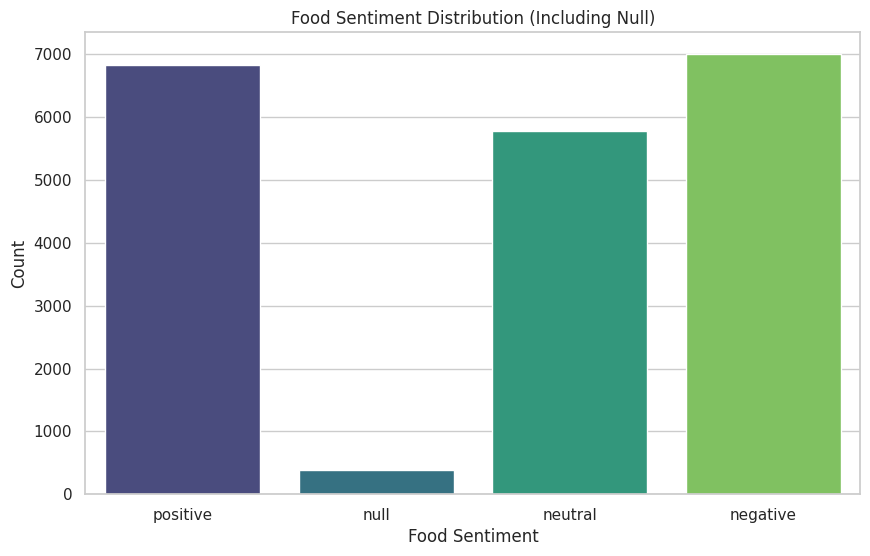

<ipython-input-10-62afb2fcddbf>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_sentiment', data=df, palette='viridis')


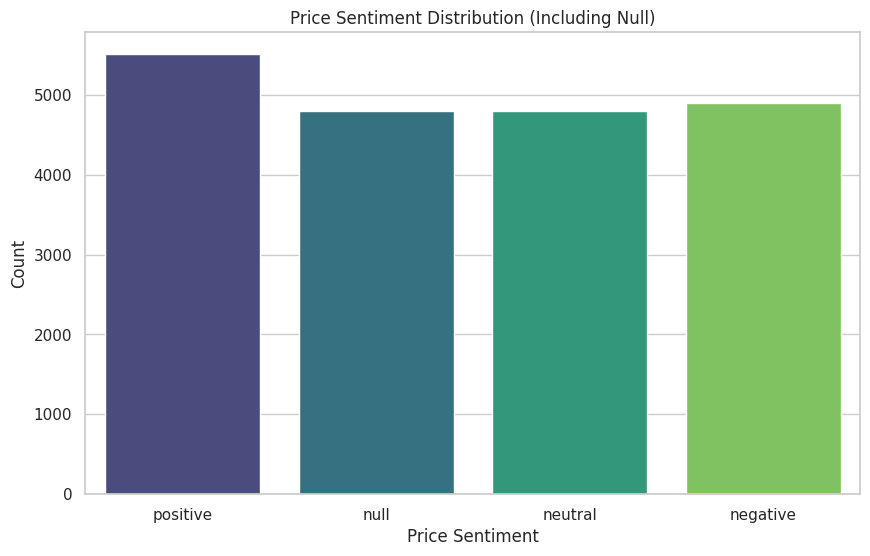

<ipython-input-10-62afb2fcddbf>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='service_sentiment', data=df, palette='viridis')


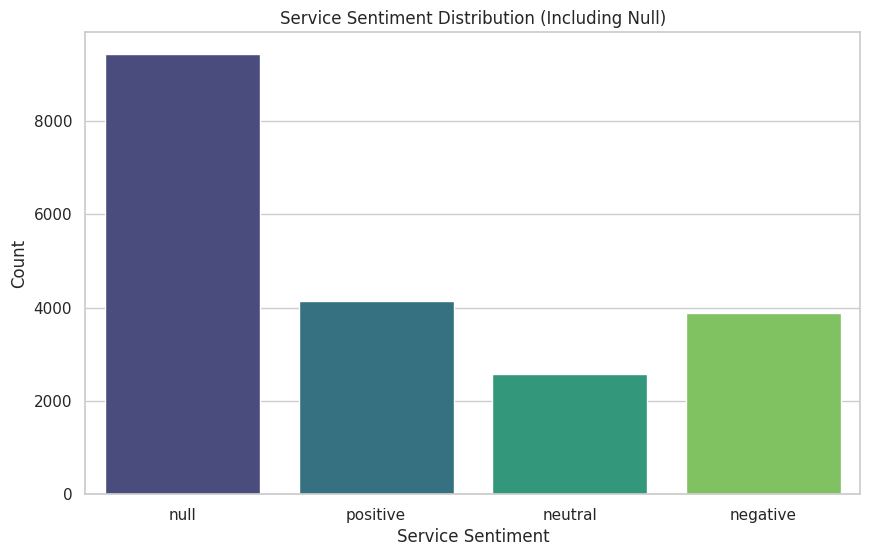

<ipython-input-10-62afb2fcddbf>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ambience_sentiment', data=df, palette='viridis')


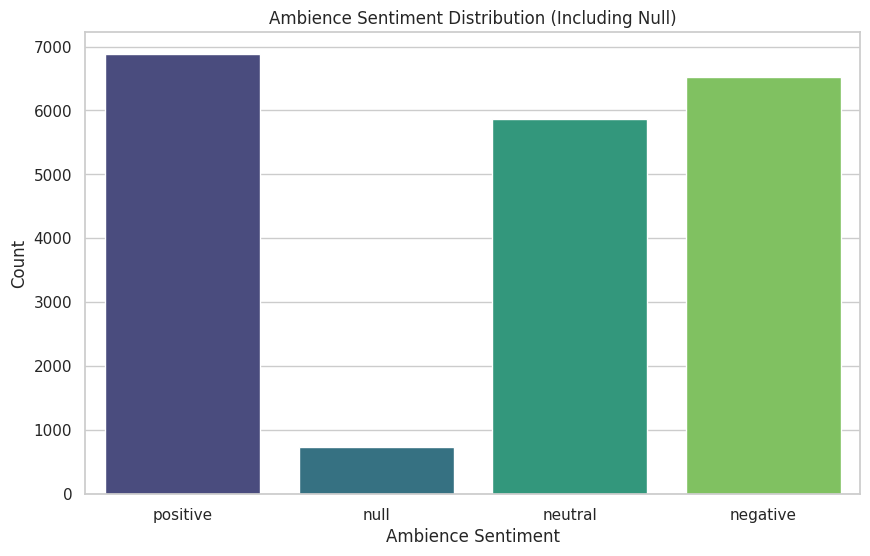

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# แทนที่ NaN ด้วย 'Null' ในแต่ละคอลัมน์
df['food_sentiment'] = df['food_sentiment'].fillna('null')
df['price_sentiment'] = df['price_sentiment'].fillna('null')
df['service_sentiment'] = df['service_sentiment'].fillna('null')
df['ambience_sentiment'] = df['ambience_sentiment'].fillna('null')

# ตรวจสอบจำนวนของแต่ละคลาสในคอลัมน์ต่าง ๆ รวมค่า Null ด้วย
food_sentiment_counts = df['food_sentiment'].value_counts()
price_sentiment_counts = df['price_sentiment'].value_counts()
service_sentiment_counts = df['service_sentiment'].value_counts()
ambience_sentiment_counts = df['ambience_sentiment'].value_counts()

# แสดงผลลัพธ์
print("Food Sentiment Counts:\n", food_sentiment_counts)
print("\nPrice Sentiment Counts:\n", price_sentiment_counts)
print("\nService Sentiment Counts:\n", service_sentiment_counts)
print("\nAmbience Sentiment Counts:\n", ambience_sentiment_counts)

# กำหนดรูปแบบกราฟ
sns.set(style="whitegrid")

# สร้างกราฟสำหรับ food_sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='food_sentiment', data=df, palette='viridis')
plt.title('Food Sentiment Distribution (Including Null)')
plt.xlabel('Food Sentiment')
plt.ylabel('Count')
plt.show()

# สร้างกราฟสำหรับ price_sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='price_sentiment', data=df, palette='viridis')
plt.title('Price Sentiment Distribution (Including Null)')
plt.xlabel('Price Sentiment')
plt.ylabel('Count')
plt.show()

# สร้างกราฟสำหรับ service_sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='service_sentiment', data=df, palette='viridis')
plt.title('Service Sentiment Distribution (Including Null)')
plt.xlabel('Service Sentiment')
plt.ylabel('Count')
plt.show()

# สร้างกราฟสำหรับ ambience_sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='ambience_sentiment', data=df, palette='viridis')
plt.title('Ambience Sentiment Distribution (Including Null)')
plt.xlabel('Ambience Sentiment')
plt.ylabel('Count')
plt.show()



ผลลัพธ์จะเป็นกราฟแท่งที่แสดงการกระจายของความคิดเห็นเกี่ยวกับอาหารในรีวิวต่าง ๆ ว่ามีแนวโน้มบวกหรือลบ

คอลัมน์ service_sentiment มีจำนวน 'Null1' สูงที่สุด ซึ่งอาจบ่งชี้ว่าในหลาย ๆ กรณี ข้อมูลเกี่ยวกับบริการไม่ถูกจัดเก็บหรือไม่สามารถให้ความเห็นได้ และอคอลัมน์ price_sentiment ก็มีจำนวน 'Null1' ค่อนข้างสูง กรณีเพิ่มเติมคือการแยกการแยกข้อมูล 'Null1' ออกจากการวิเคราะห์เพื่อไม่ให้ค่าที่เติมส่งผลต่อผลลัพธ์ หรือไม่ก็ทำการแทนเป็นค่าอื่นที่หรือจัดการกับค่า 'Null1' เพื่อให้ได้ข้อมูลที่สมบูรณ์และเหมาะสมสำหรับการสร้างโมเดลต่อไปมากชึ้น

# Data Processing

In [ ]:
import re # ใช้สำหรับการทำงานกับการจับคู่หรือค้นหาข้อความด้วย Regular Expressions (regex) เช่น การค้นหาคำ, การแทนที่ข้อความ, หรือการจัดการข้อความในรูปแบบต่างๆ
import pandas as pd
from pythainlp.tokenize import word_tokenize #  จากไลบรารี pythainlp ซึ่งเป็นฟังก์ชันสำหรับการตัดคำในข้อความภาษาไทย โดยเฉพาะสำหรับภาษาไทยที่มีลักษณะเฉพาะในการตัดคำต่างจากภาษาอังกฤษ
from pythainlp.corpus.common import thai_stopwords # รายการคำหยุด (stopwords) ภาษาไทย เช่น "และ", "คือ", "ที่" เป็นต้น ซึ่งมักจะถูกลบออกจากข้อความในกระบวนการทำความสะอาดข้อมูล (text preprocessing) เพื่อไม่ให้มีผลต่อการวิเคราะห์ข้อความ


ลบสัญลักษณ์ที่ไม่จำเป็นออกจากข้อความ
ตัดคำภาษาไทยโดยใช้ฟังก์ชัน word_tokenize()
ลบคำ (stopwords) ที่กำหนดไว้
รวมคำที่ตัดแล้วเป็นข้อความใหม่

In [ ]:
# กำหนด stopwords ภาษาไทยเป็น frozenset
stopwords = thai_stopwords()  # เรียกใช้งานฟังก์ชันให้ได้ค่าเป็น frozenset


# ฟังก์ชันทำความสะอาดข้อความ
def preprocess_text(text):
    # ลบสัญลักษณ์ที่ไม่ต้องการ (เช่น ?, ., ;, :, !, ", ๆ, ฯ)
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', 'ๆ', 'ฯ'))
    # ตัดคำภาษาไทย
    tokens = word_tokenize(final)
    # ลบคำหยุด (stopwords)
    tokens = [word for word in tokens if word not in stopwords]
    # รวมคำที่ตัดแล้วเป็นข้อความใหม่
    return " ".join(tokens)

# แทนที่ NaN ด้วย 'Null' ในแต่ละคอลัมน์
df['food_sentiment'] = df['food_sentiment'].fillna('null')
df['price_sentiment'] = df['price_sentiment'].fillna('null')
df['service_sentiment'] = df['service_sentiment'].fillna('null')
df['ambience_sentiment'] = df['ambience_sentiment'].fillna('null')

# ทำความสะอาดข้อมูลในคอลัมน์ 'review'
df['clean_review'] = df['review'].apply(preprocess_text)

# ตรวจสอบผลลัพธ์หลังทำ Preprocessing
print(df[["review", "clean_review"]].head())

                                              review  \
0  ทางเข้าร้านมาทางถนนเส้น ชัยนาท-มโนรมย์ ผ่านสี่...   
1  ปกติ คิดอะไรไม่ออก ก็จะ จัด ซานตาเฟ่ ประจำ คิด...   
2  ร้านนี้ มาได้ เรื่อย ๆ ข้าวอร่อย มีให้เลือกหลา...   
3  ปกติไปทานร้านนี้เป็นประจำเพราะไม่ไกลจากที่ทำงา...   
4  ร้านโรตีร้อยชั้น มีชื่อเรื่องโรตีโอ่ง เห็นคนพื...   

                                        clean_review  
0  ทางเข้า ร้าน ถนน เส้น   ชัยนาท - มโนรมย์   สี่...  
1  ปกติ         ซาน ตา เฟ่   ประจำ   รสชาติ พึ่งพ...  
2  ร้าน        ข้าว อร่อย   เลือก   ระดับ เผ็ด   ...  
3  ปกติ ทาน ร้าน เป็นประจำ ที่ทำงาน เพื่อน ออฟฟิศ...  
4  ร้าน โรตี ร้อย ชั้น   ชื่อเรื่อง โรตี โอ่ง   ค...  


จะเห็นได้ว่าข้อมูลในคอลัมน์ clean_review มีการตัดคำออกและมีการลบคำหยุดบางคำที่ไม่จำเป็น (เช่น

"ทางเข้าร้านมาทางถนนเส้น ชัยนาท-มโนรมย์ ผ่านสี่..."
เป็น

"ทางเข้า ร้าน ถนน เส้น ชัยนาท - มโนรมย์ สี่..." เป็นต้น)

**พล็อตกราฟแบบ barh (กราฟแท่งแนวนอน) สำหรับการนับจำนวนของแต่ละหมวดหมู่ในคอลัมน์ ambience_sentiment, service_sentiment, และ price_sentiment โดยใช้ชุดสี Dark2 จาก seaborn.**

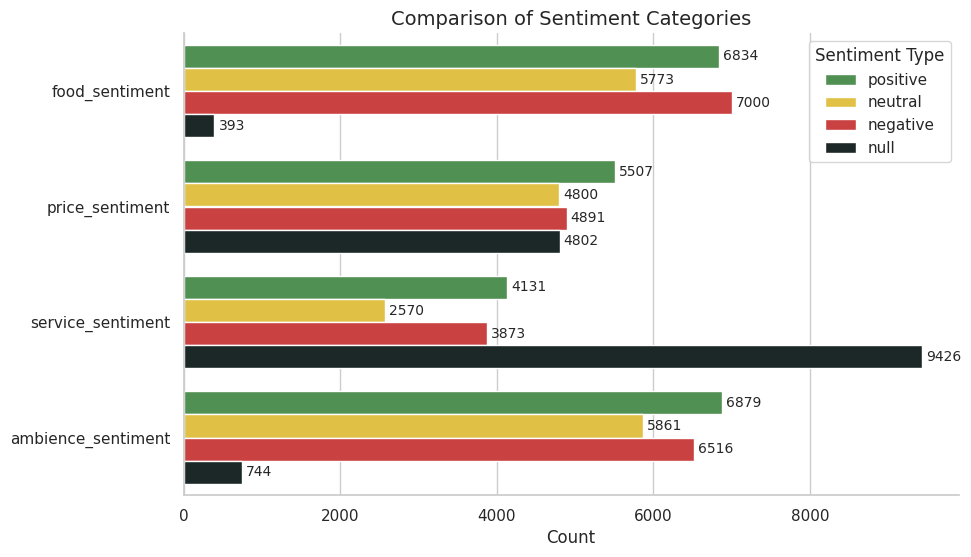

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# แปลงข้อมูลให้เหมาะสมกับการวาดกราฟ
df_melted = df.melt(value_vars=['food_sentiment', 'price_sentiment', 'service_sentiment', 'ambience_sentiment'],
                     var_name='Sentiment Type',
                     value_name='Sentiment')

# กำหนดลำดับของ Sentiment Categories
sentiment_order = ['positive', 'neutral', 'negative', 'null']

# สร้างกราฟแท่งแนวนอน (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_melted, y="Sentiment Type", hue="Sentiment",
                   hue_order=sentiment_order,  # กำหนดลำดับของ Sentiment Categories
                   palette=["#469A49", "#FAD02C", "#E12A2A", "#192A29"])  # กำหนดสี

# เพิ่มตัวเลข Count บน Bar Chart
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# ปรับแต่งกราฟ
plt.title("Comparison of Sentiment Categories", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.legend(title="Sentiment Type")
plt.gca().spines[['top', 'right']].set_visible(False)  # เอาเส้นขอบด้านบนและขวาออก
plt.show()

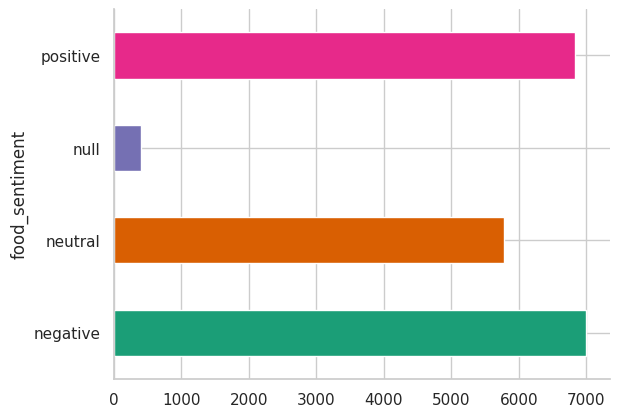

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('food_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

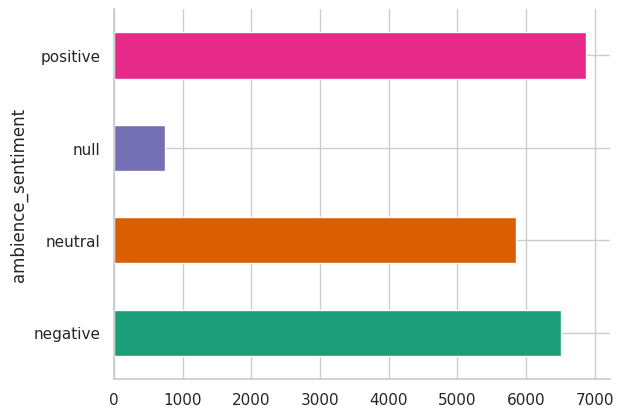

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ambience_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

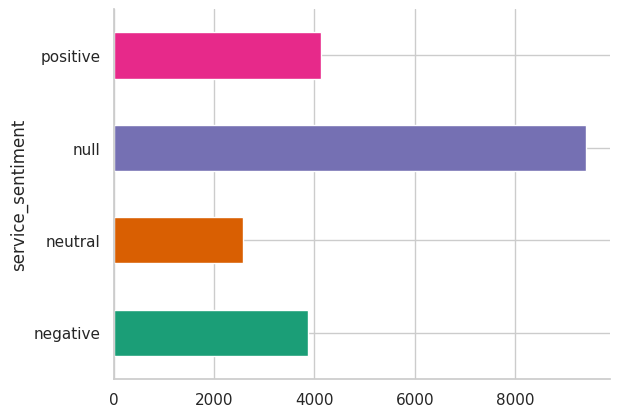

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('service_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

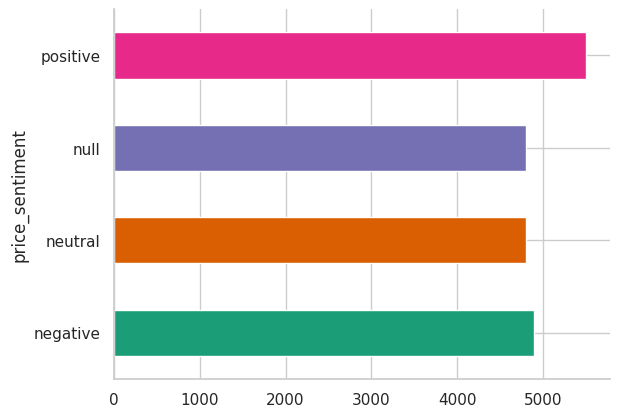

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('price_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

สร้าง heatmap เพื่อแสดงความสัมพันธ์ระหว่าง price_sentiment และ service_sentiment โดยใช้ value_counts สำหรับแต่ละกลุ่มของ price_sentiment.

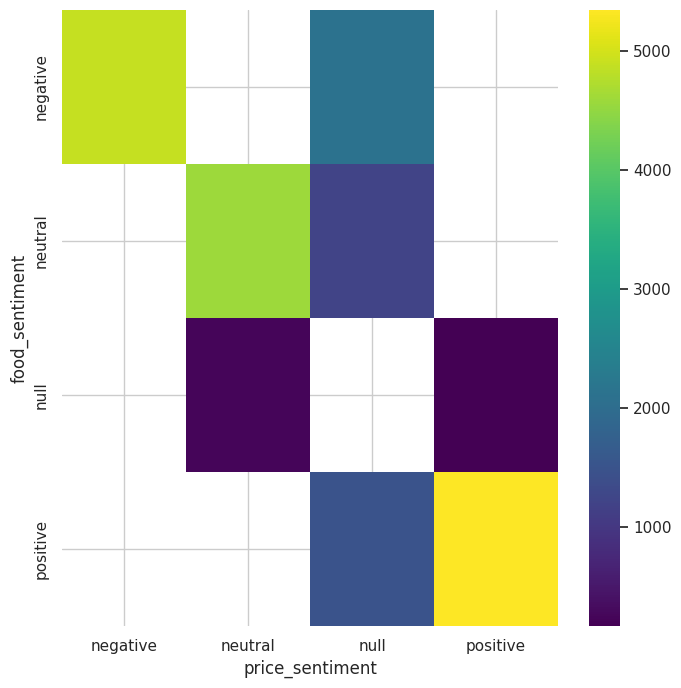

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['food_sentiment'].value_counts()
    for x_label, grp in df.groupby('price_sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('price_sentiment')
_ = plt.ylabel('food_sentiment')

แกน x แสดง price_sentiment (ความรู้สึกต่อราคา) แบ่งเป็น Null1, negative, neutral และ positive

แกน y แสดง service_sentiment (ความรู้สึกต่อบริการ) แบ่งเป็น Null1, negative, neutral และ positive

สีในแผนภูมิบ่งบอกถึงความถี่ โดยสีเหลือง/เขียวสว่างแสดงความถี่สูง (ประมาณ 3000+) ส่วนสีม่วงเข้มแสดงความถี่ต่ำ (ประมาณ 100-200)

ข้อสังเกตสำคัญ:

ความถี่สูงสุดปรากฏในคู่ "Null1-negative" และ "neutral-neutral" (สีเหลือง/เขียวสว่าง)
มีจำนวนมากพอสมควรของผู้ที่ให้คะแนน "positive-positive"
คู่ "Null1-Null1" มีจำนวนน้อยมาก (สีม่วงเข้ม)
คู่ "Negative-neutral" และ "neutral-positive" มีความถี่ปานกลาง

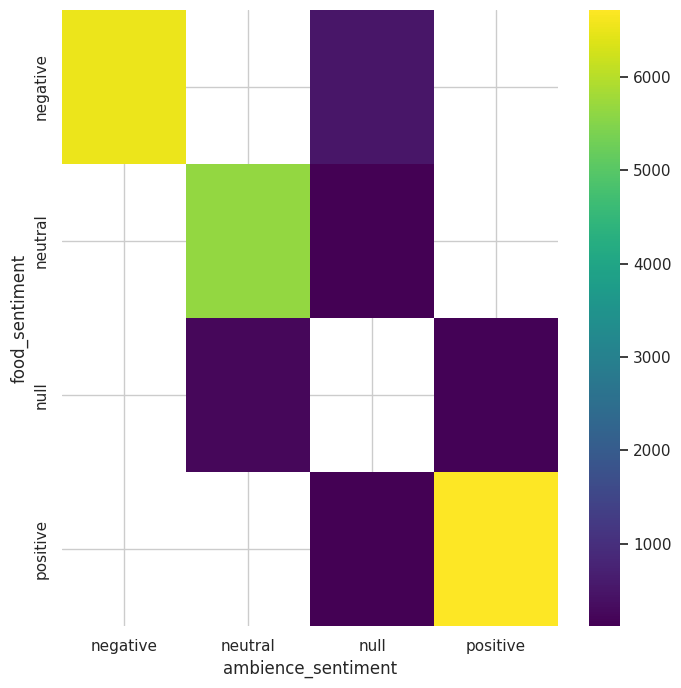

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['food_sentiment'].value_counts()
    for x_label, grp in df.groupby('ambience_sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ambience_sentiment')
_ = plt.ylabel('food_sentiment')

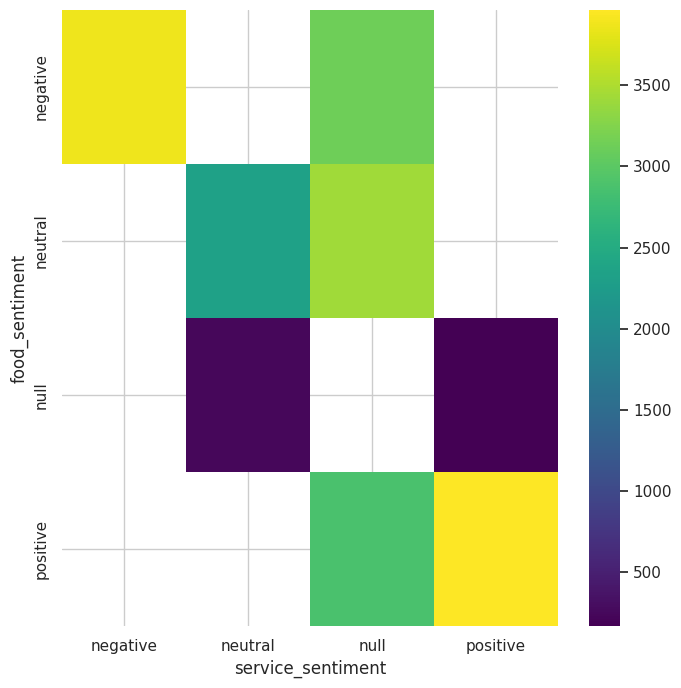

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['food_sentiment'].value_counts()
    for x_label, grp in df.groupby('service_sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('service_sentiment')
_ = plt.ylabel('food_sentiment')

ความถี่สูงสุดปรากฏในคู่ "positive-positive" (สีเหลืองสว่าง) ซึ่งแสดงว่าผู้ที่พอใจกับบริการมักจะพอใจกับบรรยากาศด้วย
คู่ "negative-negative" และ "negative-neutral" มีความถี่สูงเช่นกัน (สีเขียวสว่าง)
ความสัมพันธ์ระหว่าง "Null1-Null1" มีจำนวนน้อยมาก (สีม่วงเข้ม)
มีจำนวนปานกลางสำหรับความรู้สึก "neutral-positive" (สีฟ้าอมเขียว)

ผู้บริโภคมักมีความรู้สึกต่อบริการและบรรยากาศไปในทิศทางเดียวกัน (ทั้งด้านบวกหรือด้านลบ)
หากบริการได้รับการประเมินในแง่บวก บรรยากาศมักจะได้รับการประเมินในแง่บวกด้วย
มีความเชื่อมโยงที่ชัดเจนระหว่างความรู้สึกด้านลบต่อบริการและความรู้สึกด้านลบต่อบรรยากาศ

ข้อมูลนี้มีประโยชน์สำหรับการปรับปรุงประสบการณ์ของลูกค้า โดยแสดงให้เห็นว่าการปรับปรุงทั้งคุณภาพบริการและบรรยากาศควรได้รับความสำคัญอย่างเท่าเทียมกัน

In [ ]:
df

,id,review,food_sentiment,price_sentiment,service_sentiment,ambience_sentiment,clean_review
0,9886,ทางเข้าร้านมาทางถนนเส้น ชัยนาท-มโนรมย์ ผ่านสี่...,positive,positive,null,positive,ทางเข้า ร้าน ถนน เส้น ชัยนาท - มโนรมย์ สี่...
1,6521,ปกติ คิดอะไรไม่ออก ก็จะ จัด ซานตาเฟ่ ประจำ คิด...,positive,null,positive,positive,ปกติ ซาน ตา เฟ่ ประจำ รสชาติ พึ่งพ...
2,7429,ร้านนี้ มาได้ เรื่อย ๆ ข้าวอร่อย มีให้เลือกหลา...,positive,null,positive,positive,ร้าน ข้าว อร่อย เลือก ระดับ เผ็ด ...
3,20550,ปกติไปทานร้านนี้เป็นประจำเพราะไม่ไกลจากที่ทำงา...,positive,null,positive,positive,ปกติ ทาน ร้าน เป็นประจำ ที่ทำงาน เพื่อน ออฟฟิศ...
4,34692,ร้านโรตีร้อยชั้น มีชื่อเรื่องโรตีโอ่ง เห็นคนพื...,positive,positive,null,positive,ร้าน โรตี ร้อย ชั้น ชื่อเรื่อง โรตี โอ่ง ค...
...,...,...,...,...,...,...,...
19995,11800,ครั้งก่อนมีโอกาสมาทานติ๋มซำที่ May Flower Rest...,negative,null,negative,negative,มีโอ กา สมาทาน ติ๋ม ซำ May Flower Restau...
19996,14516,ร้านอาหารจีนเจ้าดังที่มีลูกค้ามากมาย เริ่มเข้า...,negative,negative,null,negative,ร้าน อาหารจีน เจ้า ดังที่ ลูกค้า เข้าสู่ ห้า...
19997,38123,นึกถึงอาหารทะเลสดๆคุณภาพแน่นๆเมื่อใหร่. ที่นี่...,negative,negative,negative,null,นึกถึง อาหารทะเล สด คุณภาพ แน่น ใหร่ ที่นี่ ...
19998,25128,คือพาเพื่อนมาทานอาหารเมือง จากที่เคยผิดหวังร้า...,negative,null,negative,negative,เพื่อน ทานอาหาร เมือง ผิดหวัง ร้าน เมือง ร...


# Train Model

ฝึกโมเดลหลายๆ ตัวเพื่อทำนายข้อมูลในหลายๆ ป้าย (multi-label classification) ซึ่งแต่ละป้ายแสดงถึงการจำแนกความคิดเห็นในด้านต่างๆ เช่น ความคิดเห็นเกี่ยวกับอาหาร (food_sentiment), ราคา (price_sentiment), การบริการ (service_sentiment), และบรรยากาศ (ambience_sentiment) จากข้อมูลข้อความที่ได้รับการทำความสะอาดแล้ว (clean_review) โดยใช้เทคนิคต่างๆ เช่น Bag of Words (BOW) และ TF-IDF ในการแปลงข้อมูลข้อความเป็นเวกเตอร์



---



แบ่ง y_val (Test data) 20% (4000 จาก 20000 records)
และดูว่าแต่ละ labels ถูกดึงมา pred กี่ records บ้าง **ทำข้อความเป็นตัวหนา**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# สมมติว่า df คือ DataFrame ที่มีคอลัมน์ 'clean_review' และ labels
labels = ['food_sentiment', 'price_sentiment', 'service_sentiment', 'ambience_sentiment']

# ข้อมูลข้อความที่สะอาด (clean_review)
X = df["clean_review"]

# แบ่งข้อมูล Train-Test (80-20) โดยที่ 80% จะใช้เป็น train และ 20% เป็น test
X_train, X_val, y_train, y_val = train_test_split(X, df[labels], test_size=0.2, random_state=42)

# สรุปจำนวนของแต่ละ label ที่ถูกดึงมาใน y_val
print("Number of records in y_val (Test Data):", len(y_val))
print("Records in y_val (Sample size 20%):", y_val.shape[0])

# สรุปจำนวนของแต่ละ label ใน y_val (นับจำนวนแต่ละ label)
for label in labels:
    print(f"Count of each sentiment for {label}:")
    print(y_val[label].value_counts())
    print("="*50)


Number of records in y_val (Test Data): 4000
Records in y_val (Sample size 20%): 4000
Count of each sentiment for food_sentiment:
food_sentiment
negative    1380
positive    1376
neutral     1168
null          76
Name: count, dtype: int64
Count of each sentiment for price_sentiment:
price_sentiment
positive    1102
neutral      981
negative     980
null         937
Name: count, dtype: int64
Count of each sentiment for service_sentiment:
service_sentiment
null        1898
positive     832
negative     751
neutral      519
Name: count, dtype: int64
Count of each sentiment for ambience_sentiment:
ambience_sentiment
positive    1389
negative    1292
neutral     1182
null         137
Name: count, dtype: int64


null:  หมายถึงค่าที่หายไปหรือไม่สามารถประเมินได้ (missing values)
ซึ่งพบได้ในทุก label โดยเฉพาะใน service_sentiment ที่มีการเก็บข้อมูลเป็นจำนวนมาก (1898 record).

และค่า positive, negative, และ neutral แสดงถึงอารมณ์หรือความรู้สึกที่เกี่ยวข้องกับแต่ละ label ซึ่งค่อนข้างสมดุลกันในหลาย ๆ label (ยกเว้น service_sentiment ที่มี Null1 จำนวนมาก).



---



และทดสอบโมเดลหลายตัว เช่น Logistic Regression, Random Forest, และ SVM เพื่อเปรียบเทียบประสิทธิภาพของแต่ละโมเดลในการทำนายความคิดเห็นในด้านต่างๆ ตามป้ายที่กำหนดไว้.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# คอลัมน์ที่ใช้เป็น label
labels = ['food_sentiment', 'price_sentiment', 'service_sentiment', 'ambience_sentiment']

# ข้อมูลข้อความที่สะอาด (clean_review)
X = df["clean_review"]

# แปลงข้อมูลเป็นเวกเตอร์ (BOW)
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(X)

# แปลงข้อมูลเป็นเวกเตอร์ (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# แบ่งข้อมูล Train-Test (80-20)
X_train_bow, X_val_bow, y_train, y_val = train_test_split(X_bow, df[labels], test_size=0.2, random_state=42)
X_train_tfidf, X_val_tfidf, _, _ = train_test_split(X_tfidf, df[labels], test_size=0.2, random_state=42)

# สร้างโมเดล MultiOutputClassifier ที่ใช้ Logistic Regression
multi_target_model_bow_lr = MultiOutputClassifier(LogisticRegression())
multi_target_model_bow_lr.fit(X_train_bow, y_train)

multi_target_model_tfidf_lr = MultiOutputClassifier(LogisticRegression())
multi_target_model_tfidf_lr.fit(X_train_tfidf, y_train)

# สร้างโมเดล MultiOutputClassifier ที่ใช้ Random Forest
multi_target_model_bow_rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
multi_target_model_bow_rf.fit(X_train_bow, y_train)

multi_target_model_tfidf_rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
multi_target_model_tfidf_rf.fit(X_train_tfidf, y_train)

# สร้างโมเดล MultiOutputClassifier ที่ใช้ SVM
multi_target_model_bow_svm = MultiOutputClassifier(SVC(kernel='linear'))
multi_target_model_bow_svm.fit(X_train_bow, y_train)

multi_target_model_tfidf_svm = MultiOutputClassifier(SVC(kernel='linear'))
multi_target_model_tfidf_svm.fit(X_train_tfidf, y_train)

# ทำนายผล
y_pred_bow_lr = multi_target_model_bow_lr.predict(X_val_bow)
y_pred_tfidf_lr = multi_target_model_tfidf_lr.predict(X_val_tfidf)

y_pred_bow_rf = multi_target_model_bow_rf.predict(X_val_bow)
y_pred_tfidf_rf = multi_target_model_tfidf_rf.predict(X_val_tfidf)

y_pred_bow_svm = multi_target_model_bow_svm.predict(X_val_bow)
y_pred_tfidf_svm = multi_target_model_tfidf_svm.predict(X_val_tfidf)

# แสดงผลลัพธ์
models = [
    ('Logistic Regression', y_pred_bow_lr, y_pred_tfidf_lr),
    ('Random Forest', y_pred_bow_rf, y_pred_tfidf_rf),
    ('SVM', y_pred_bow_svm, y_pred_tfidf_svm)
]

for model_name, y_pred_bow, y_pred_tfidf in models:
    print(f"\nModel: {model_name}")
    for i, label in enumerate(labels):
        print(f"Classification Report for {label} using BOW:")
        print(classification_report(y_val[label], y_pred_bow[:, i]))

        print(f"Classification Report for {label} using TF-IDF:")
        print(classification_report(y_val[label], y_pred_tfidf[:, i]))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Model: Logistic Regression
Classification Report for food_sentiment using BOW:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1380
     neutral       0.93      0.99      0.96      1168
        null       0.91      0.84      0.88        76
    positive       0.98      0.93      0.96      1376

    accuracy                           0.97      4000
   macro avg       0.96      0.94      0.95      4000
weighted avg       0.97      0.97      0.97      4000

Classification Report for food_sentiment using TF-IDF:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1380
     neutral       0.89      0.99      0.93      1168
        null       1.00      0.46      0.63        76
    positive       0.97      0.90      0.93      1376

    accuracy                           0.95      4000
   macro avg       0.96      0.84      0.87      4000
weighted avg       0.95      0.95      0.95      4

Classification Report จะบอกรายละเอียดเกี่ยวกับความแม่นยำในการทำนายของโมเดลในแต่ละประเภทของข้อมูล เช่น:

Precision ความแม่นยำของโมเดลในการทำนายแต่ละคลาส (เช่น ความแม่นยำในการทำนาย "positive" หรือ "negative")
Recall หรือเรียกว่าอัตราการตรวจจับข้อมูลที่จริง ๆ มีในคลาสนั้น (เช่น การตรวจจับ "positive" ที่จริง)
F1-Score เป็นการรวมความแม่นยำและการเรียกคืน (เหมาะสำหรับกรณีที่ข้อมูลไม่สมดุล)
Accuracy คืออัตราความถูกต้องรวมของโมเดลในข้อมูลทั้งหมด

**Model Results**

- Logistic Regression
ได้ผลลัพธ์ที่ดีในหลาย ๆ ชุดข้อมูล (accuracy ประมาณ 0.97 ถึง 0.98 ขึ้นอยู่กับประเภท)
พบว่าโมเดลทำได้ดีมากในบางประเภท เช่น "negative" (precision = 1.00) แต่ก็มีปัญหาบ้างในบางคลาส (เช่น "Null1" ที่มี precision ต่ำ)

- ส่วน Random Forest
โมเดลนี้ก็มีผลลัพธ์ที่ดีเช่นเดียวกับ Logistic Regression แต่บางประเภทอาจได้คะแนนที่ต่ำลงบ้าง
ผลลัพธ์ที่ดีมากในข้อมูลที่มี "negative" แต่ก็มีปัญหาบ้างในคลาส "Null1" เช่นกัน

ความแม่นยำ ใน BOW อยู่ที่ประมาณ 0.97 และใน TF-IDF ก็มีความแม่นยำที่ใกล้เคียงกัน
Precision และ Recall มีความสมดุลดี โดยเฉพาะในประเภท negative ที่มีความแม่นยำสูง


- โมเดลทั้งสาม(Logistic Regression และ Random Forest, SVM) สามารถทำนายได้ดีในหลายๆ คลาส แต่ก็ยังมีปัญหาบ้างในบางคลาสเช่น "Null1"
คุณอาจต้องปรับแต่งโมเดล (เช่น เพิ่มจำนวนการเรียนรู้หรือปรับขนาดข้อมูล) เพื่อให้ผลลัพธ์ดีขึ้น โดยเฉพาะกับข้อมูลที่มีการกระจายตัวสูงหรือไม่สมดุล (เช่น "Null1")


แต่ถ้าอยากจะให้ได้ดีขึ้นเราอาจจะต้องใช้เวลารันนานกว่านี้ครับ เพราะConvergenceWarning ข้อความเตือนเกี่ยวกับการที่โมเดลไม่สามารถหาคำตอบที่ดีที่สุดได้ในจำนวนรอบที่กำหนดไว้ (iterations) ซึ่งอาจหมายความว่าโมเดลต้องการรอบการเรียนรู้ที่มากขึ้นหรือข้อมูลที่ควรได้รับการปรับขนาด (scaling)



---



พล็อต Confusion Matrix สำหรับแต่ละโมเดล (Logistic Regression, Random Forest, SVM) โดยใช้ Bag of Words (BOW) และ TF-IDF เป็นตัวแปลงข้อความ (vectorizer) สำหรับแต่ละโมเดล เพื่อให้เห็นผลลัพธ์ของการทำนายว่าแต่ละโมเดลมีประสิทธิภาพดีแค่ไหนในการทำนายข้อมูลแต่ละประเภท (เช่น Null1, Negative, Neutral, Positive)

Model: Logistic Regression - Label: food_sentiment


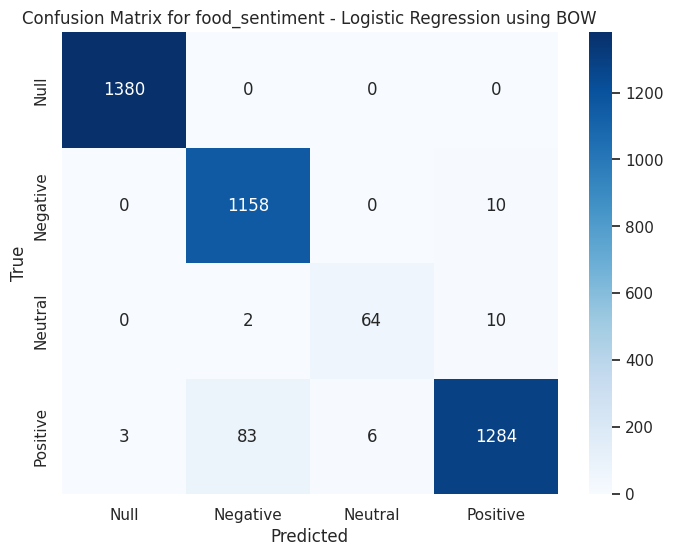

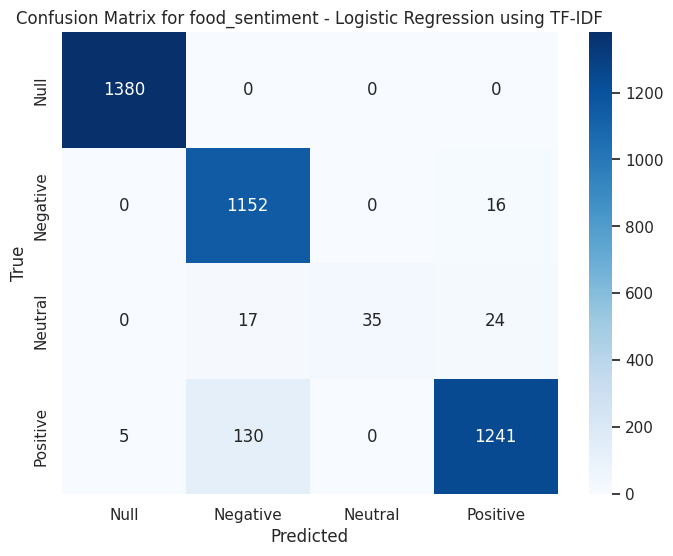

Model: Logistic Regression - Label: price_sentiment


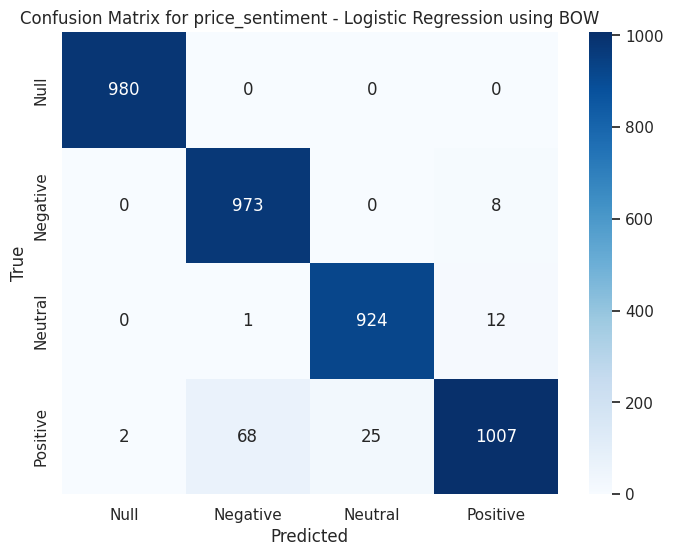

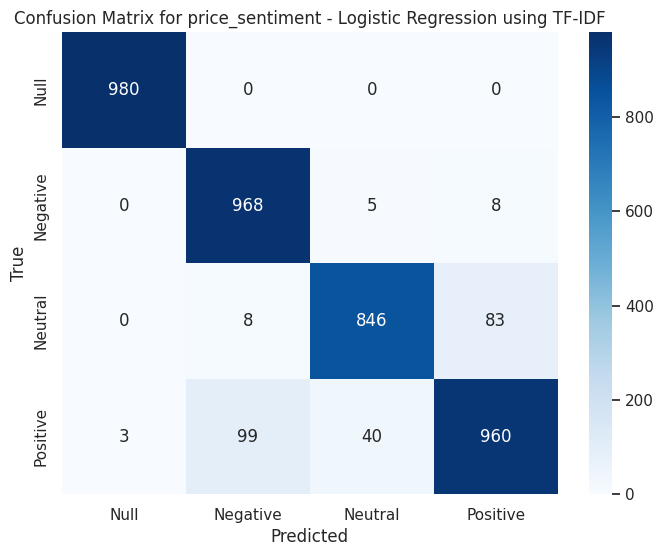

Model: Logistic Regression - Label: service_sentiment


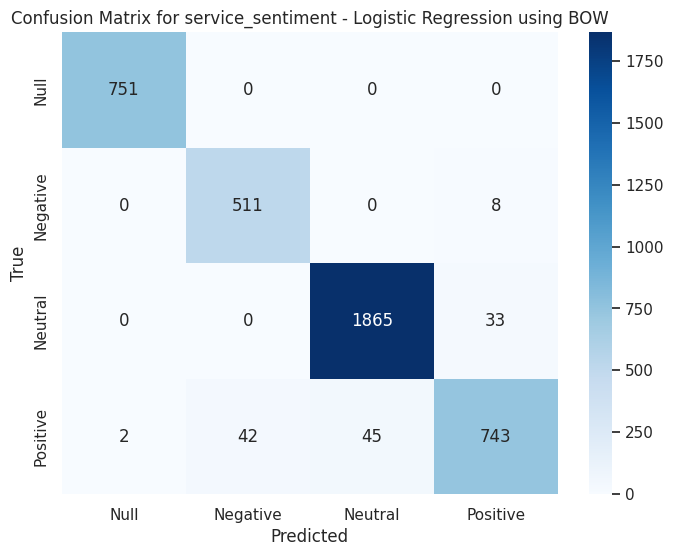

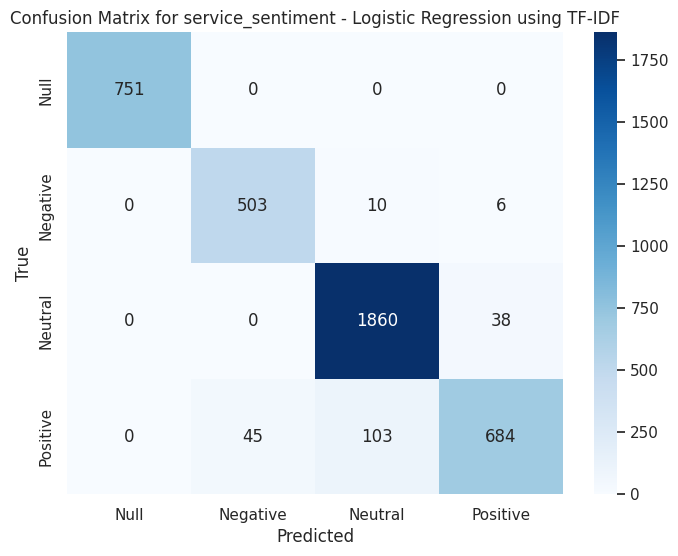

Model: Logistic Regression - Label: ambience_sentiment


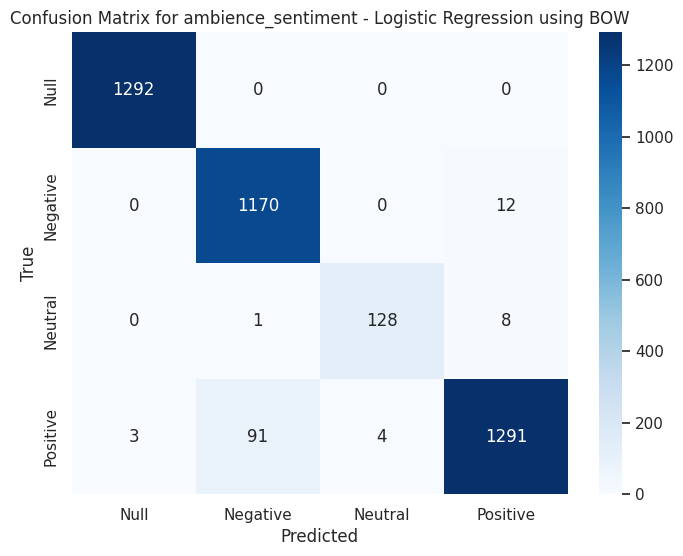

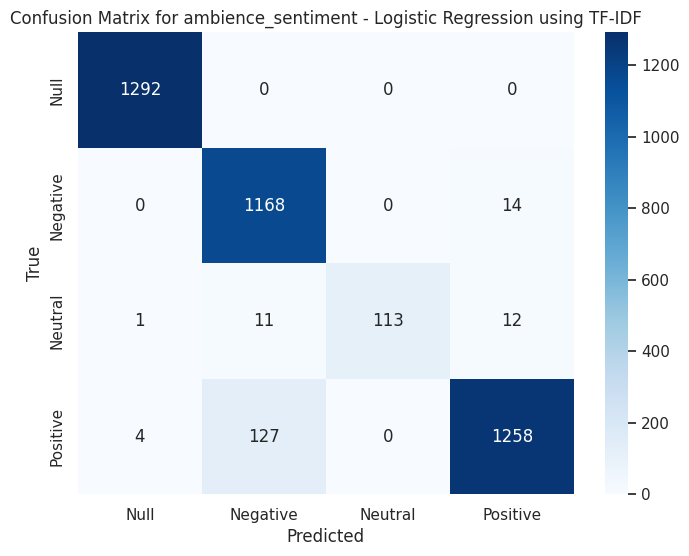

Model: Random Forest - Label: food_sentiment


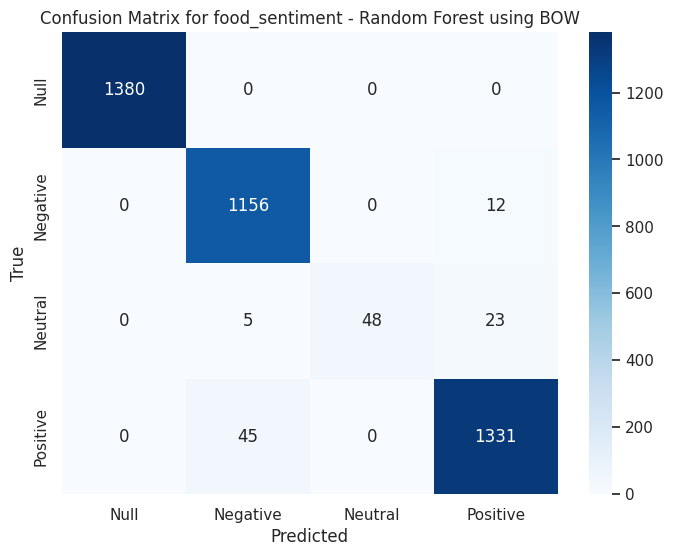

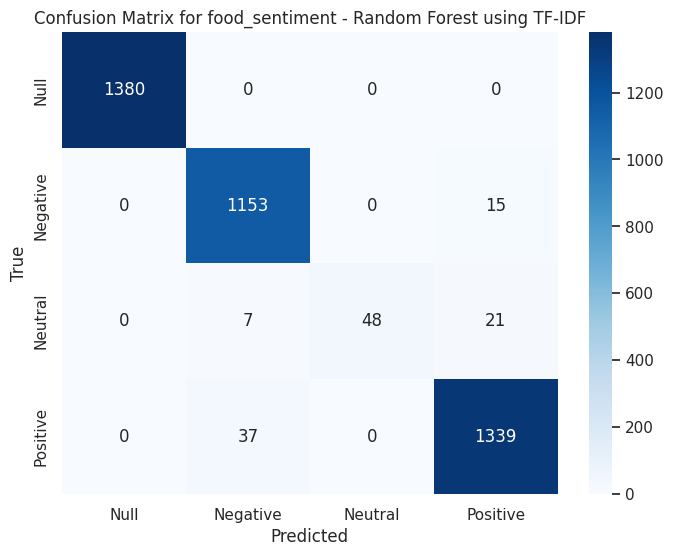

Model: Random Forest - Label: price_sentiment


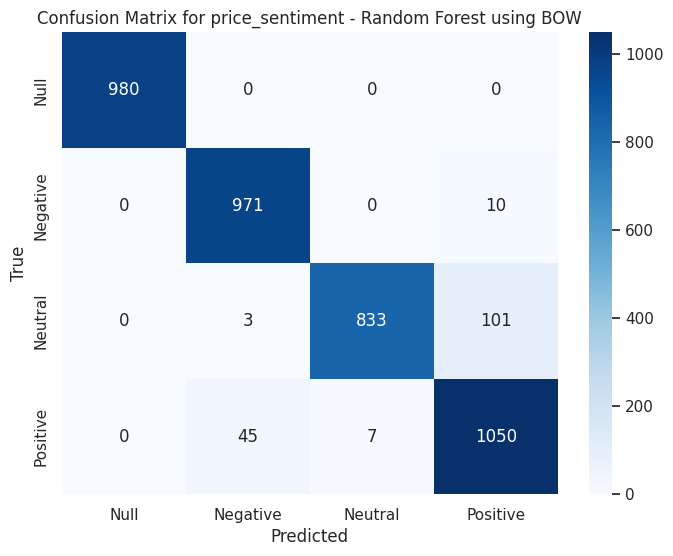

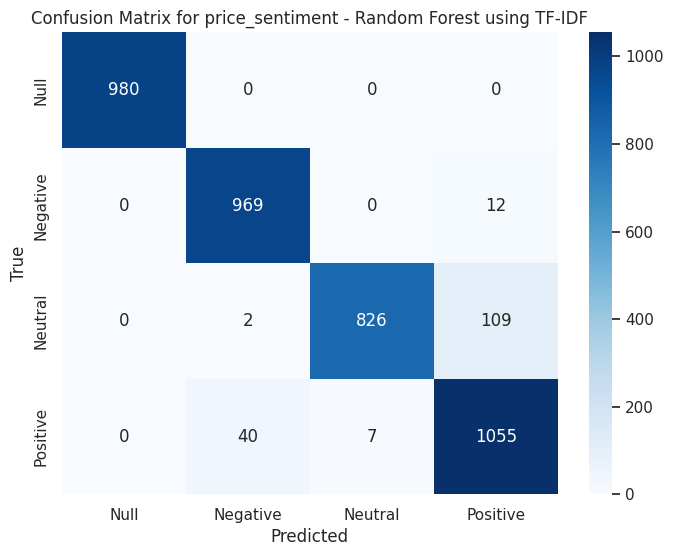

Model: Random Forest - Label: service_sentiment


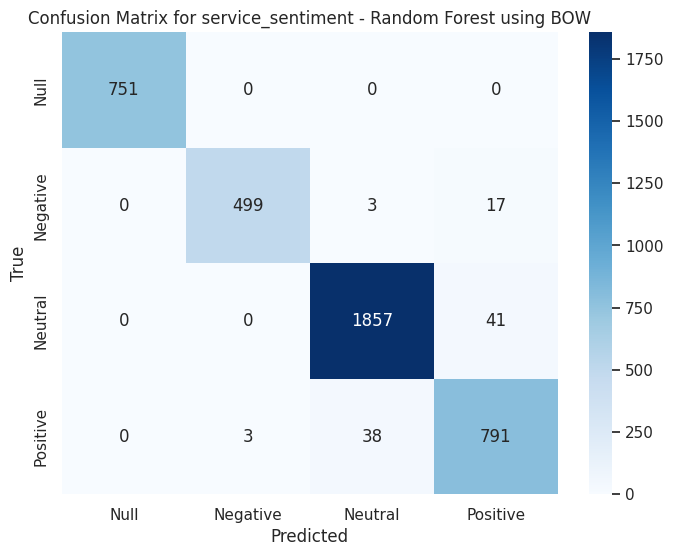

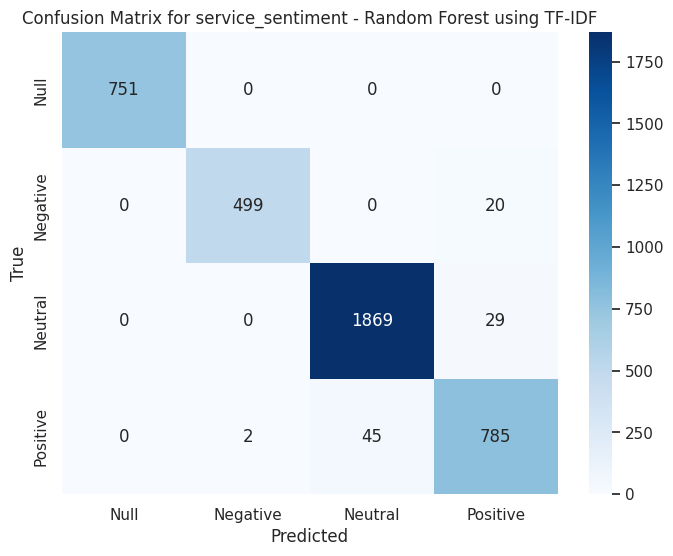

Model: Random Forest - Label: ambience_sentiment


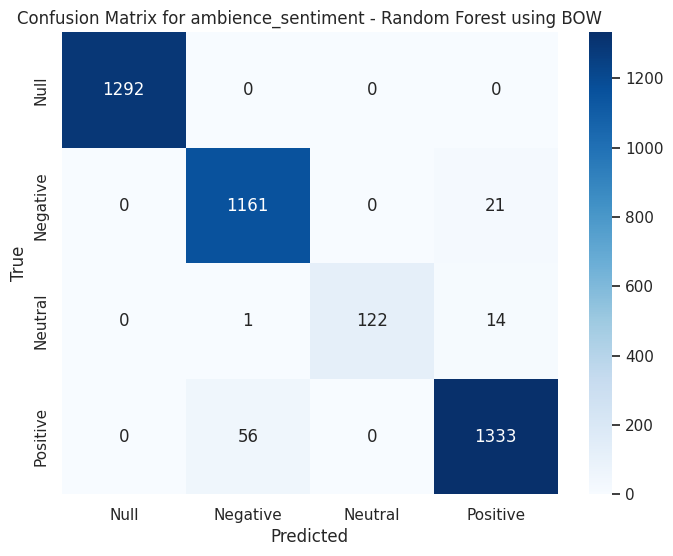

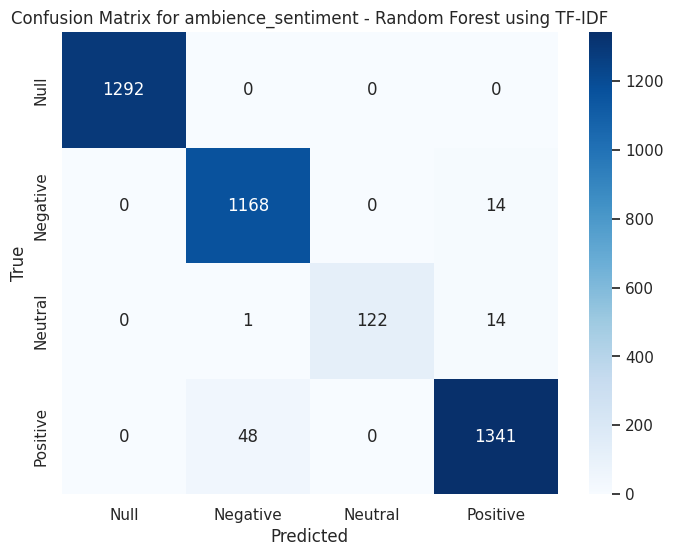

Model: SVM - Label: food_sentiment


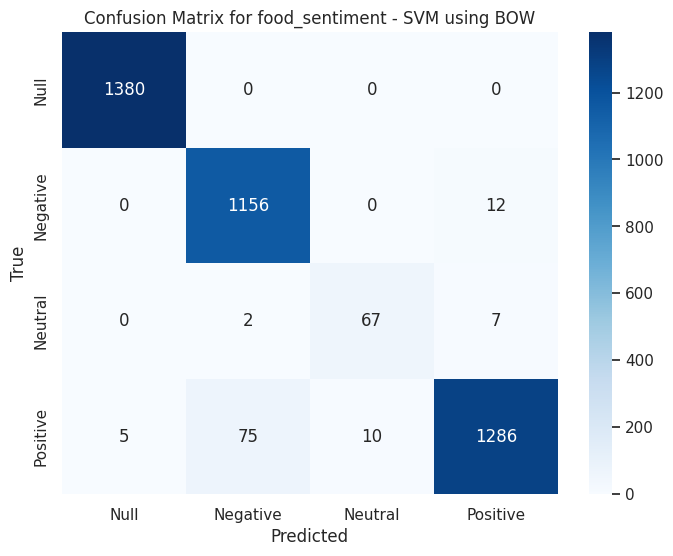

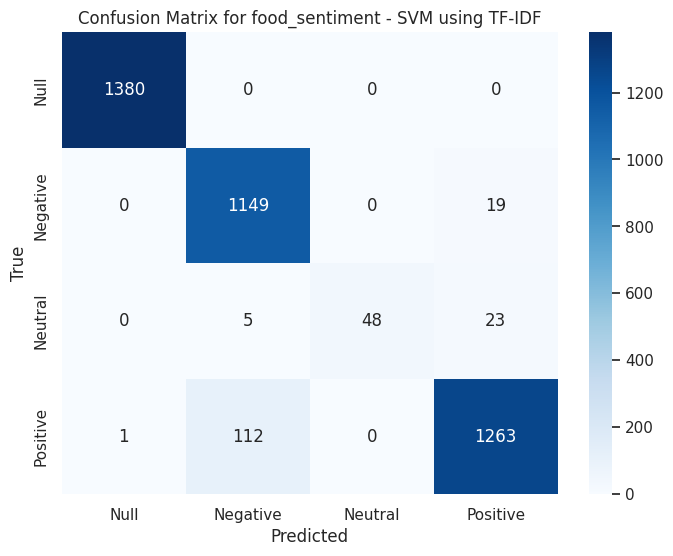

Model: SVM - Label: price_sentiment


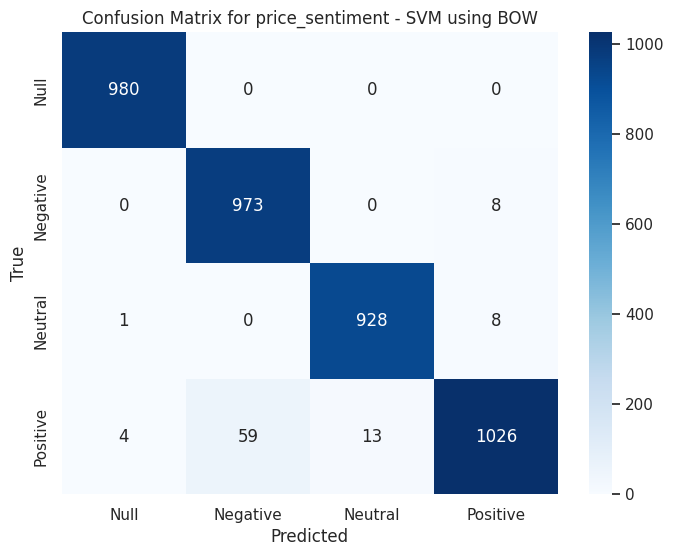

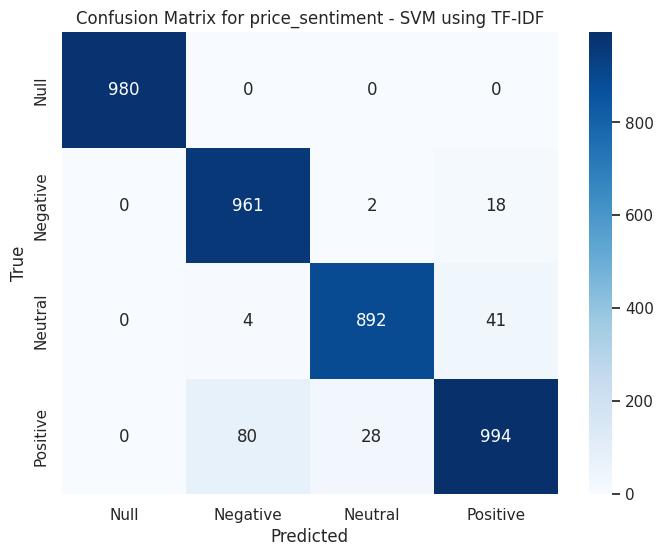

Model: SVM - Label: service_sentiment


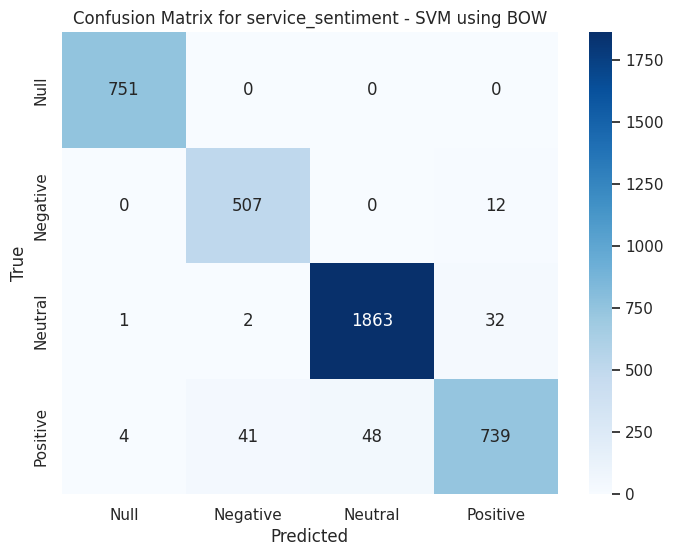

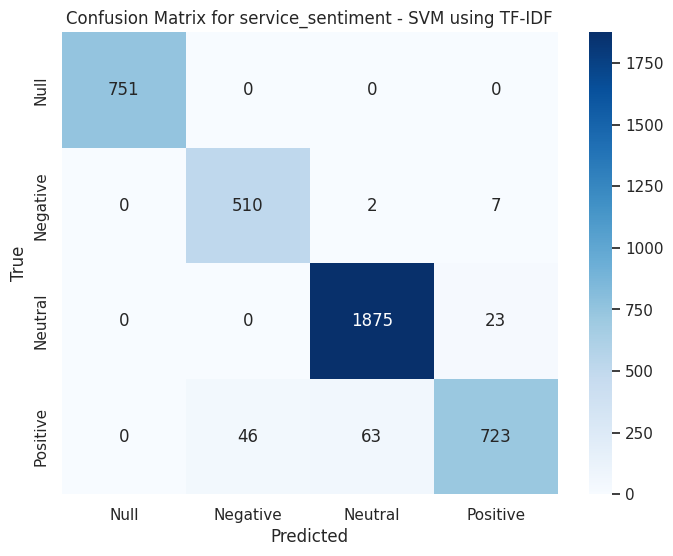

Model: SVM - Label: ambience_sentiment


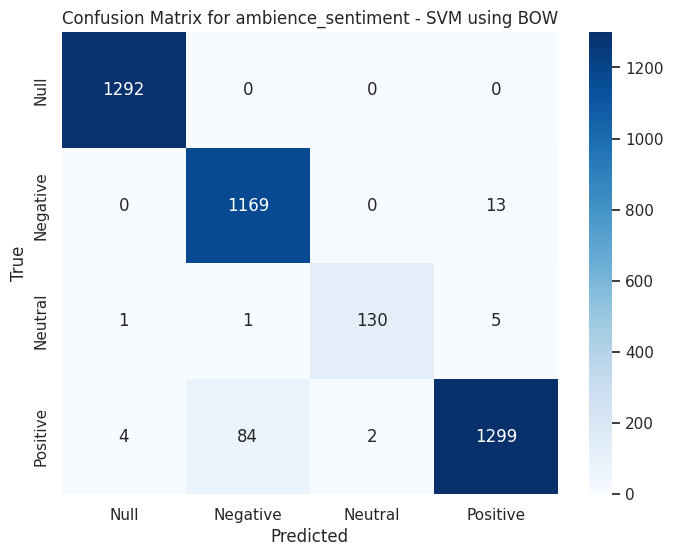

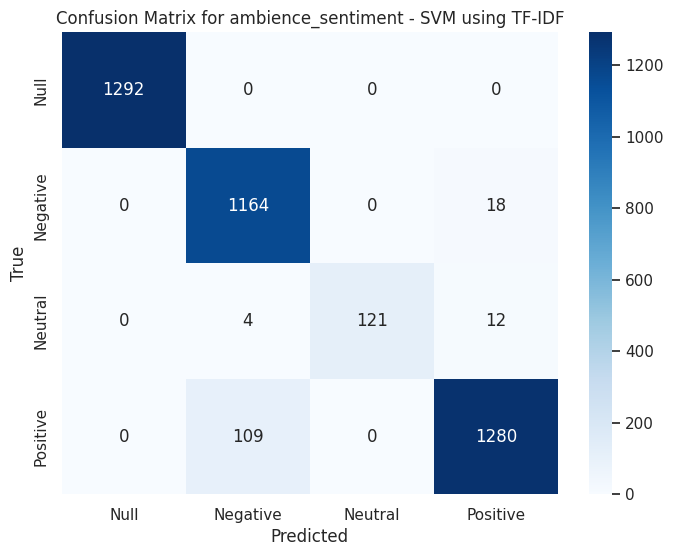

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ฟังก์ชั่นพล็อต Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, label, model_name, vectorizer_type):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Null', 'Negative', 'Neutral', 'Positive']  # กำหนดชื่อ label
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {label} - {model_name} using {vectorizer_type}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# พล็อต Confusion Matrix สำหรับแต่ละโมเดล
models = [
    ('Logistic Regression', y_pred_bow_lr, y_pred_tfidf_lr),
    ('Random Forest', y_pred_bow_rf, y_pred_tfidf_rf),
    ('SVM', y_pred_bow_svm, y_pred_tfidf_svm)
]

for model_name, y_pred_bow, y_pred_tfidf in models:
    for i, label in enumerate(labels):
        print(f"Model: {model_name} - Label: {label}")

        # พล็อต Confusion Matrix สำหรับ BOW
        plot_confusion_matrix(y_val[label], y_pred_bow[:, i], label, model_name, 'BOW')

        # พล็อต Confusion Matrix สำหรับ TF-IDF
        plot_confusion_matrix(y_val[label], y_pred_tfidf[:, i], label, model_name, 'TF-IDF')


**Accuracy, Precision, Recall, F1-score รวมเป็น DataFrame**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ฟังก์ชันคำนวณ metric ต่างๆ
def evaluate_model(y_true, y_pred, model_name, vectorizer_type):
    results = []
    for i, label in enumerate(labels):
        accuracy = accuracy_score(y_true[label], y_pred[:, i])
        precision = precision_score(y_true[label], y_pred[:, i], average='weighted', zero_division=0)
        recall = recall_score(y_true[label], y_pred[:, i], average='weighted', zero_division=0)
        f1 = f1_score(y_true[label], y_pred[:, i], average='weighted', zero_division=0)
        results.append([model_name, vectorizer_type, label, accuracy, precision, recall, f1])

    return results

# เก็บผลลัพธ์ทุกโมเดล
all_results = []

for model_name, y_pred_bow, y_pred_tfidf in models:
    all_results.extend(evaluate_model(y_val, y_pred_bow, model_name, 'BOW'))
    all_results.extend(evaluate_model(y_val, y_pred_tfidf, model_name, 'TF-IDF'))

# สร้าง DataFrame
df_results = pd.DataFrame(all_results, columns=['Model', 'Vectorizer', 'Label', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# แสดงตารางผลลัพธ์
print(df_results)


                  Model Vectorizer               Label  Accuracy  Precision  \
0   Logistic Regression        BOW      food_sentiment   0.97150   0.972379   
1   Logistic Regression        BOW     price_sentiment   0.97100   0.971725   
2   Logistic Regression        BOW   service_sentiment   0.96750   0.967590   
3   Logistic Regression        BOW  ambience_sentiment   0.97025   0.971374   
4   Logistic Regression     TF-IDF      food_sentiment   0.95200   0.954969   
5   Logistic Regression     TF-IDF     price_sentiment   0.93850   0.939157   
6   Logistic Regression     TF-IDF   service_sentiment   0.94950   0.949598   
7   Logistic Regression     TF-IDF  ambience_sentiment   0.95775   0.960499   
8         Random Forest        BOW      food_sentiment   0.97875   0.979080   
9         Random Forest        BOW     price_sentiment   0.95850   0.960156   
10        Random Forest        BOW   service_sentiment   0.97450   0.974765   
11        Random Forest        BOW  ambience_sentime

In [ ]:
# Export the DataFrame to an Excel file named 'model_results.xlsx'
df_results.to_excel("model_results.xlsx", index=False)

In [ ]:
df_results.to_excel('/content/drive/My Drive/model_results.xlsx', index=False)

ตัวอย่างผลลัพธ์จาก Logistic Regression ที่ใช้ BOW จะได้ค่า Accuracy, Precision, Recall, F1-score ตามที่แสดงในตาราง.



* Logistic Regression

โดยรวมแล้วโมเดลนี้มีค่าความแม่นยำ (Accuracy) 0.971 และคะแนน F1 ที่ดี แต่จะเห็นว่าค่าความแม่นยำสำหรับ TF-IDF ต่ำกว่าค่า BOW โดยเฉพาะในหมวดหมู่ food_sentiment ซึ่งอาจเนื่องจากคุณลักษณะของคำที่มีความสัมพันธ์สูงในรูปแบบ BOW มากกว่า TF-IDF
แต่ในบางหมวดหมู่ เช่น price_sentiment และ service_sentiment ค่า Precision และ Recall อยู่ในระดับดีพอสมควร

* Random Forest

มีการประเมินผลที่ดีในทุกหมวดหมู่ โดยเฉพาะใน food_sentiment ที่มีค่าความแม่นยำสูงถึง 0.98 ทั้งใน BOW และ TF-IDF
ค่า F1-score สูงเกือบจะในทุกหมวดหมู่เมื่อใช้ TF-IDF, โดยเฉพาะ ambience_sentiment ซึ่งแสดงให้เห็นถึงความสามารถของโมเดลในการทำงานกับข้อมูลที่ซับซ้อนมากขึ้น

* และโมเดล SVM

ให้ผลลัพธ์ที่ดีในหลายๆ หมวดหมู่ โดยเฉพาะ price_sentiment ซึ่งมีค่าความแม่นยำสูงถึง 0.977 ใน BOW
อย่างไรก็ตาม สังเกตว่า SVM มีค่า Precision และ Recall ที่ต่ำกว่า Random Forest ในบางหมวดหมู่ เช่น service_sentiment และ food_sentiment เมื่อใช้ TF-IDF

Random Forest ดูเหมือนจะมีประสิทธิภาพดีที่สุดในทั้งสองรูปแบบของตัวแปร (BOW, TF-IDF) โดยมีผลลัพธ์ที่ดีในหลายๆ หมวดหมู่
Logistic Regression และ SVM ก็มีประสิทธิภาพดีในบางหมวดหมู่ แต่ต้องการการปรับปรุงเพิ่มเติมเพื่อให้สามารถจัดการกับข้อมูลที่ซับซ้อนได้ดีขึ้น

อาจพิจารณาการใช้ hyperparameter tuning หรือ การใช้เทคนิค ensemble เช่น XGBoost หรือ LightGBM เพื่อเพิ่มความสามารถในการจำแนกข้อมูลในหมวดหมู่ที่มีลักษณะเฉพาะ



---



ใช้ f1_score เพื่อคำนวณค่าของ F1-Score สำหรับแต่ละ label ในแต่ละโมเดล (BOW และ TF-IDF) และใช้ค่า weighted average เพื่อให้ค่า F1-Score สอดคล้องกับข้อมูลที่มีคลาสไม่สมดุล (imbalanced classes).
f1_scores dictionary: เก็บ F1-Score สำหรับแต่ละโมเดลและแต่ละ label.
และใช้ np.mean เพื่อหาค่า F1-Score โดยเฉลี่ยของแต่ละโมเดล (รวมทั้ง BOW และ TF-IDF).
เลือกโมเดลที่มีค่า F1-Score สูงสุดเพื่อสรุปว่าโมเดลไหนดีที่สุด เป็น Best model

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# สร้าง dictionary เพื่อเก็บค่า F1-Score สำหรับแต่ละโมเดลและแต่ละ label
f1_scores = {
    'Logistic Regression BOW': [],
    'Logistic Regression TF-IDF': [],
    'Random Forest BOW': [],
    'Random Forest TF-IDF': [],
    'SVM BOW': [],
    'SVM TF-IDF': []
}

# คำนวณ accuracy ของแต่ละ label
def calculate_accuracy_for_each_label(y_true, y_pred, labels):
    accuracies = []
    for i, label in enumerate(labels):
        accuracy = accuracy_score(y_true[label], y_pred[:, i])
        accuracies.append(accuracy)
    return accuracies

# ประเมินโมเดลและคำนวณ F1-Score, Accuracy
for model_name, y_pred_bow, y_pred_tfidf in models:
    for i, label in enumerate(labels):
        # คำนวณ F1-Score และ Accuracy สำหรับ BOW
        if model_name == 'Logistic Regression':
            f1_scores['Logistic Regression BOW'].append(f1_score(y_val[label], y_pred_bow[:, i], average='weighted'))
        elif model_name == 'Random Forest':
            f1_scores['Random Forest BOW'].append(f1_score(y_val[label], y_pred_bow[:, i], average='weighted'))
        elif model_name == 'SVM':
            f1_scores['SVM BOW'].append(f1_score(y_val[label], y_pred_bow[:, i], average='weighted'))

        # คำนวณ F1-Score และ Accuracy สำหรับ TF-IDF
        if model_name == 'Logistic Regression':
            f1_scores['Logistic Regression TF-IDF'].append(f1_score(y_val[label], y_pred_tfidf[:, i], average='weighted'))
        elif model_name == 'Random Forest':
            f1_scores['Random Forest TF-IDF'].append(f1_score(y_val[label], y_pred_tfidf[:, i], average='weighted'))
        elif model_name == 'SVM':
            f1_scores['SVM TF-IDF'].append(f1_score(y_val[label], y_pred_tfidf[:, i], average='weighted'))

# หาค่า F1-Score สูงสุดในแต่ละโมเดล
f1_max = {key: np.mean(value) for key, value in f1_scores.items()}
best_model = max(f1_max, key=f1_max.get)

# คำนวณ accuracy ของโมเดลที่ดีที่สุด
if 'BOW' in best_model:
    best_pred = y_pred_bow
else:
    best_pred = y_pred_tfidf

# คำนวณ accuracy ของแต่ละ label
accuracies = calculate_accuracy_for_each_label(y_val, best_pred, labels)

# คำนวณค่าเฉลี่ยของ accuracy
average_accuracy = np.mean(accuracies)

# แสดงผลลัพธ์
print("\nF1-Score for each model:")
for model, f1 in f1_max.items():
    print(f"{model}: {f1:.4f}")

# สรุปโมเดลที่ดีที่สุด
print(f"\nBest Model: {best_model} with F1-Score: {f1_max[best_model]:.4f}")

# แสดงค่า accuracy เฉลี่ยของโมเดลที่ดีที่สุด
print(f"Average Accuracy score from selected model is {average_accuracy:.4f}")


F1-Score for each model:
Logistic Regression BOW: 0.9699
Logistic Regression TF-IDF: 0.9486
Random Forest BOW: 0.9720
Random Forest TF-IDF: 0.9734
SVM BOW: 0.9715
SVM TF-IDF: 0.9611

Best Model: Random Forest TF-IDF with F1-Score: 0.9734
Average Accuracy score from selected model is 0.9614


สรุปได้ว่า Random Forest (TF-IDF) เป็นโมเดลที่ดีที่สุดในกรณีนี้ เนื่องจากมีค่า F1-Score สูงที่สุด และค่า Average Accuracy ที่ได้ก็ถือว่าอยู่ในระดับที่ดีครับผม



---



# Save Model

**บันทึกโมเดลและเวกเตอร์ที่เกี่ยวข้อง (BOW และ TF-IDF) โดยใช้ pickle และ joblib ซึ่งเป็นวิธีที่ดีในการเก็บโมเดลสำหรับการใช้งานในอนาคต**

โมเดลทั้ง 6 ตัว (Logistic Regression, Random Forest, SVM ที่ใช้ BOW และ TF-IDF) จะถูกบันทึกในไฟล์ .pkl ด้วย pickle ซึ่งจะช่วยให้สามารถโหลดโมเดลเหล่านี้มาใช้ในภายหลังได้

และการบันทึกเวกเตอร์ BOW และ TF-IDF ด้วย joblib ก็ทำได้ดี เนื่องจาก joblib เหมาะสำหรับการบันทึกออบเจ็กต์ขนาดใหญ่ เช่น เวกเตอร์หรือโมเดลที่มีข้อมูลขนาดใหญ่

In [ ]:
import pickle
import joblib

# บันทึกโมเดล
with open("multi_target_model_bow_lr.pkl", "wb") as f:
    pickle.dump(multi_target_model_bow_lr, f)

with open("multi_target_model_tfidf_lr.pkl", "wb") as f:
    pickle.dump(multi_target_model_tfidf_lr, f)

with open("multi_target_model_bow_rf.pkl", "wb") as f:
    pickle.dump(multi_target_model_bow_rf, f)

with open("multi_target_model_tfidf_rf.pkl", "wb") as f:
    pickle.dump(multi_target_model_tfidf_rf, f)

with open("multi_target_model_bow_svm.pkl", "wb") as f:
    pickle.dump(multi_target_model_bow_svm, f)

with open("multi_target_model_tfidf_svm.pkl", "wb") as f:
    pickle.dump(multi_target_model_tfidf_svm, f)

# บันทึกเวกเตอร์ BOW และ TF-IDF
joblib.dump(bow_vectorizer, 'bow_vectorizer.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

# implement Model

หลดโมเดลและเวกเตอร์ที่บันทึกไว้ จากนั้นทำนายผลสำหรับข้อมูลใหม่ที่ผ่านการแปลงเป็นเวกเตอร์ BOW และ TF-IDF โดยใช้โมเดลที่โหลดขึ้นมา

หลังจากแปลงข้อมูลใหม่เป็นเวกเตอร์ BOW หรือ TF-IDF แล้วจะใช้โมเดลที่เหมาะสมในการทำนายผล

In [ ]:
import joblib

# โหลดโมเดลที่บันทึกไว้
multi_target_model_bow_lr_loaded = joblib.load('multi_target_model_bow_lr.pkl')
multi_target_model_bow_dt_loaded = joblib.load('multi_target_model_bow_svm.pkl')
multi_target_model_bow_rf_loaded = joblib.load('multi_target_model_bow_rf.pkl')

# โหลดเวกเตอร์ BOW และ TF-IDF
bow_vectorizer_loaded = joblib.load('bow_vectorizer.pkl')
tfidf_vectorizer_loaded = joblib.load('tfidf_vectorizer.pkl')

# ตัวอย่างข้อมูลใหม่
new_data = ["ทางเข้าร้านมาทางถนนเส้น ชัยนาท-มโนรมย์ ผ่านสี่แยกไฟแดงชัยนาท มาทาง ร.พ.ชัยนาท ขับรถไปตรงไปประมาณ กม.ที่ 285 ขับเลยไปอีกนิดนุงเจอ ทางเข้ามีป้ายร้าน ครัวท่าลาภ ใหญ่ ๆ ขับตรงไปอีกเรื่อยๆ จนเจอแม่น้ำเจ้าพระยาเลยค่ะ สักพักจะเจอร้าน ไปถึงร้านแล้วแบบว่า เจอบรรยากาศ กันตกแต่งร้าน ริมแม่น้ำเจ้าพระยาแล้ว คุ้มค่าเลย อาหารก้ออร่อยมากๆ รสชาดเหมือนแม่ทำให้ทาน สรุปว่า ต้องไปให้ได้นะค่ะ จะได้ไม่พลาดกับความอร่อยทั้ง บรรยากาศและอาหารสด สะอาด อร่อย"]

# แปลงข้อมูลใหม่เป็นเวกเตอร์
new_data_bow = bow_vectorizer_loaded.transform(new_data)
new_data_tfidf = tfidf_vectorizer_loaded.transform(new_data)

# ทำนายผลโดยใช้โมเดลแต่ละตัว
y_pred_new_bow_lr = multi_target_model_bow_lr_loaded.predict(new_data_bow)
y_pred_new_bow_dt = multi_target_model_bow_dt_loaded.predict(new_data_bow)
y_pred_new_bow_rf = multi_target_model_bow_rf_loaded.predict(new_data_bow)

y_pred_new_tfidf_lr = multi_target_model_bow_lr_loaded.predict(new_data_tfidf)
y_pred_new_tfidf_dt = multi_target_model_bow_dt_loaded.predict(new_data_tfidf)
y_pred_new_tfidf_rf = multi_target_model_bow_rf_loaded.predict(new_data_tfidf)

# แสดงผลลัพธ์
print("Prediction using BOW - Logistic Regression:", y_pred_new_bow_lr)
print("Prediction using BOW - Decision Tree:", y_pred_new_bow_dt)
print("Prediction using BOW - Random Forest:", y_pred_new_bow_rf)

print("Prediction using TF-IDF - Logistic Regression:", y_pred_new_tfidf_lr)
print("Prediction using TF-IDF - Decision Tree:", y_pred_new_tfidf_dt)
print("Prediction using TF-IDF - Random Forest:", y_pred_new_tfidf_rf)


Prediction using BOW - Logistic Regression: [['positive' 'positive' 'null' 'positive']]
Prediction using BOW - Decision Tree: [['positive' 'positive' 'null' 'positive']]
Prediction using BOW - Random Forest: [['positive' 'positive' 'null' 'positive']]
Prediction using TF-IDF - Logistic Regression: [['neutral' 'null' 'null' 'neutral']]
Prediction using TF-IDF - Decision Tree: [['neutral' 'null' 'null' 'neutral']]
Prediction using TF-IDF - Random Forest: [['neutral' 'neutral' 'null' 'neutral']]


การที่ผลลัพธ์ถูกทำนายเป็น positive และ neutral อาจแสดงว่าโมเดลจับความหมายได้บางส่วนจากข้อความที่เราส่งให้

ถ้าต้องการให้โมเดลสามารถทำนายได้ดียิ่งขึ้นหรือให้ผลลัพธ์ที่มีความแม่นยำสูงขึ้น, ลองพิจารณาการปรับปรุงหรือเพิ่มข้อมูลการฝึกในคลาสต่าง ๆ หรือ คลาสที่ใช้งาน รวมถึงการปรับแต่งพารามิเตอร์ของโมเดลให้ดีขึ้นตามผลลัพธ์ที่ได้จากการทดสอบ

แต่ไปดูในช้อข้อมูลแล้วเอามาเทียบกันก็ถือว่าทำนายได้ตรงครับ แต่ถ้าเป็นข้อความใหม่ๆ ที่ไม่เคยเห็นมาก่อนก็ต้องทดสอบดูอีกทีครับว่าจะแม่นยำหรือต้องปรับจูนโมเดลและทำข้อมูลเพิ่ม
